In [3]:
cd /content/drive/My Drive/9sem/aprendizaje maquina/lab3_KNN

/content/drive/My Drive/9sem/aprendizaje maquina/lab3_KNN


#Funciones

In [4]:
def l2_distance(a, b):
    """Computes the Euclidean distance matrix between a and b.

    Inputs:
        A: D x M array.
        B: D x N array.

    Returns:
        E: M x N Euclidean distances between vectors in A and B.


    Author   : Roland Bunschoten
               University of Amsterdam
               Intelligent Autonomous Systems (IAS) group
               Kruislaan 403  1098 SJ Amsterdam
               tel.(+31)20-5257524
               bunschot@wins.uva.nl
    Last Rev : Wed Oct 20 08:58:08 MET DST 1999
    Tested   : PC Matlab v5.2 and Solaris Matlab v5.3

    Copyright notice: You are free to modify, extend and distribute 
       this code granted that the author of the original code is 
       mentioned as the original author of the code.

    Fixed by JBT (3/18/00) to work for 1-dimensional vectors
    and to warn for imaginary numbers.  Also ensures that 
    output is all real, and allows the option of forcing diagonals to
    be zero.  

    Basic functionality ported to Python 2.7 by JCS (9/21/2013).
    """
    #verifica que los datos contengan el mismo nuemro de caracteristicas
    #en este caso el tamaño de la imagen
    if a.shape[1] != b.shape[1]:
        raise ValueError("A and B should be of same dimensionality")
    #eleva al cuadrado y suma toda fila
    aa = np.sum(a**2, axis=1)
    #eleva al cuadrado y suma toda fila
    bb = np.sum(b**2, axis=1)
    #producto punto de a y b transpuesta
    ab = np.dot(a, b.T)
    
    return np.sqrt(aa[:, np.newaxis] + bb[np.newaxis, :] - 2*ab)

def run_knn(k, train_data, train_labels, valid_data):
    """Uses the supplied training inputs and labels to make
    predictions for validation data using the K-nearest neighbours
    algorithm.

    Note: N_TRAIN is the number of training examples,
          N_VALID is the number of validation examples, 
          and M is the number of features per example.

    Inputs:
        k:            The number of neighbours to use for classification 
                      of a validation example.
        train_data:   The N_TRAIN x M array of training
                      data.
        train_labels: The N_TRAIN x 1 vector of training labels
                      corresponding to the examples in train_data 
                      (must be binary).
        valid_data:   The N_VALID x M array of data to
                      predict classes for.

    Outputs:
        valid_labels: The N_VALID x 1 vector of predicted labels 
                      for the validation data.
    """

    # TODO call l2_distance to compute distance between valid data and train data
    dist = l2_distance(valid_data,train_data)
    # TODO sort the distance to get top k nearest data
    #ordena las distancia y devuelve los indices ordenados
    dist=np.argsort(dist)
    #obtiene lo k primeros indices
    nearest = dist[:,0:k]
    #convierto los train lables en un array unidimensional
    train_labels = train_labels.reshape(-1)
    #obtine los valores de los k ejemplos de entrenamiento mas cercanos por cada ejemplo de prueba
    valid_labels = train_labels[nearest]

    # note this only works for binary labels
    valid_labels = (np.mean(valid_labels, axis=1) >= 0.5).astype(np.int)
    valid_labels = valid_labels.reshape(-1,1)

    return valid_labels



#Lectura de los datos de entrenamiento

In [5]:
import numpy as np
#mnist_train.npz  
#X[2,8]
#y[0,1]
def load_train():
    """Loads training data."""
    with open('mnist_train.npz', 'rb') as f:
        train_set = np.load(f)
        train_inputs = train_set['train_inputs']
        train_targets = train_set['train_targets']
    return train_inputs, train_targets 
x_train, y_train= load_train()
x_train.shape[0]

200

#Ejemplo de los dados de entrenamiento

[1.]


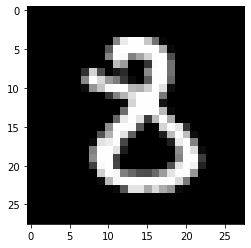

In [6]:
from matplotlib import pyplot as plt
n_ima=120
first_image = np.array(x_train[n_ima], dtype='float')
print(y_train[n_ima])
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#Lectura de los datos de validación

In [8]:
def load_valid():
    """Loads validation data."""
    with open('mnist_valid.npz', 'rb') as f:
        valid_set = np.load(f)
        valid_inputs = valid_set['valid_inputs']
        valid_targets = valid_set['valid_targets']
    
    return valid_inputs, valid_targets 
x_valid, y_valid= load_valid()
x_valid.shape[0]

50

#Ejemlo de los datos de validacion

[1.]


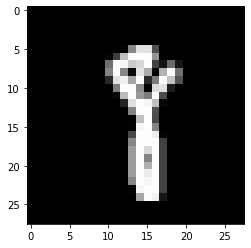

In [9]:
n_ima=49
first_image = np.array(x_valid[n_ima], dtype='float')
print(y_valid[n_ima])
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#Lectura datos de prueba

In [40]:
def load_test():
    """Loads test data."""
    with open('mnist_test.npz', 'rb') as f:
        test_set = np.load(f)
        test_inputs = test_set['test_inputs']
        test_targets = test_set['test_targets']

    return test_inputs, test_targets 
x_test, y_test= load_test()

#Ejemplo de los datos de prueba

[1.]


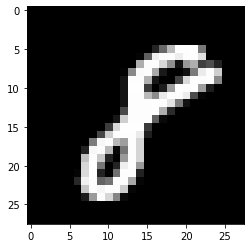

In [41]:
n_ima=49
first_image = np.array(x_test[n_ima], dtype='float')
print(y_valid[n_ima])
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

#Ejecucion de KNN

##Datos de validación

In [51]:

valid_K=[1,3,5,7,9]
rates=[]
for k in valid_K:
  result=0
  #run
  result=run_knn(k, x_train, y_train, x_valid)
  rate=(len(y_valid)-np.sum(np.abs(result-y_valid)))/len(y_valid)
  rates.append(rate)
  print(rate)



0.94
0.98
0.98
0.98
0.96


##Grafica de desempeño para datos de validacion

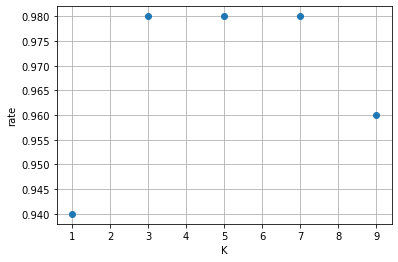

In [52]:
# muestra los datos en una grafica
import matplotlib.pyplot as plt

x = valid_K
y =rates
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='K', ylabel='rate')
ax.plot(x, y,'o')
fig.savefig("K-rate_validation.png")
plt.show()

## Datos de prueba

In [56]:
valid_K=[3,5,7]
rates=[]
for k in valid_K:
  result=0
  #run
  result=run_knn(k, x_train, y_train, x_test)
  rate=(len(y_test)-np.sum(np.abs(result-y_test)))/len(y_test)
  rates.append(rate)
  print(rate)

0.98
0.98
0.92


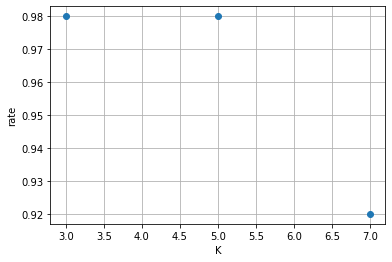

In [57]:
# muestra los datos en una grafica
import matplotlib.pyplot as plt

x =valid_K
y =rates
#grafica de datos 
fig, ax = plt.subplots()
ax.grid()
ax.set(xlabel='K', ylabel='rate')
ax.plot(x, y,'o')
fig.savefig("K-rate_test.png")
plt.show()